# EDA ON TRAVEL WEBSITE (TRAVEL TRIANGLE)

#Data Collection (Web Scraping)
* collecting data from the website using libraries requests and BeautifulSoup

In [ ]:
import re
import numpy as np
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
package=[]
duration_days=[]
duration_nights=[]
after_discount=[]
original_price=[]
discount=[]
cities=[]
selected_hotels = []
Activities=[]
No_of_activities=[]
up_to_hotels=[]
category=[]
location=[]
dest=[]

def getData(cat,loc,j,z):
  for i in cat:
      url=f"https://traveltriangle.com/{i}-packages/{z}/page/{j}?category={i}&destination_type=india"
      page=requests.get(url)
      soup=BeautifulSoup(page.text)

      p=soup.find_all('span',class_="fw9 m0 f16 pfc3")
      for k in p:
        category.append(i)
        location.append(z)
        package.append(k.text)
        if k.text=='Sikkim Darjeeling Honeymoon Deal Package' or 'Exclusive Deal' in k.text :
          original_price.append(np.nan)
          after_discount.append(np.nan)
          selected_hotels.append(np.nan)
          up_to_hotels.append(np.nan)

        if k.text=='Fascinating Maldives Luxury Family Package':
          original_price.append(np.nan)
          discount.append(np.nan)

        if 'kerala' in loc:
          dest.append('India')
        else:
          dest.append("International")

      dn=soup.find_all('span',class_="iblock sfc6")
      for i in dn:
        a=re.findall(r'(\d+)\sDays',i.text)
        duration_days.append(a[0])

      for i in dn:
        b=re.findall(r'(\d+)\sNights',i.text)
        duration_nights.append(b[0])

      pr=soup.find_all('p',class_="sfc3 m0 f20 fw9 priceVal at_newprice")
      for i in pr:
        if len(i.text.split("â\x82¹ "))<3:
          after_discount.append(np.nan)
        else:
          after_discount.append(i.text.split("â\x82¹ ")[1])

      for i in pr:
        if len(i.text.split("â\x82¹ "))==3:
          original_price.append(i.text.split("â\x82¹ ")[2])



      dis=soup.find_all('span',class_="f12 fw4 pt2 pb2 pl8 pr8 radius20 pbc1 sfcw at_discount_label")
      for i in dis:
          discount.append(re.findall(r'(\d+)\W\sOff',i.text)[0])

      c=soup.find_all('ul',class_="clearfix package-cities-list at_packagecity_list")
      for i in c:
        cities.append(",".join(re.findall(r'([A-Za-z]+?)(?=\s*\(\d+D)',i.text)))


      # Loop through all radio inputs
      for inp in soup.find_all("input", {"type": "radio", "class": "radio-common-circle at_packagehotel_rating"}):
          if inp.has_attr("checked"):  # Only the selected one
              label = soup.find("label", {"for": inp["id"]})
              if label:
                  selected_hotels.append(label.get_text(strip=True))

      act=soup.find_all('ul',class_="package-tags at_package_tags")
      for i in act:
        Activities.append(i.text.split())
        No_of_activities.append(len(i.text.split()))

      for s in soup.find_all("p", class_="mb0"):
          text = s.get_text(strip=True)
          if "Star" in text:   # Make sure it's about hotel stars
            up_to_hotels.append(text)
def getDataByLoc(loc,cat):
  for z in loc:
    for j in range(1,3):
      getData(cat,loc,j,z)
cat=['honeymoon','family','friends']
d_type=['india','international']
loc1=['kerala','himachal','sikkim','uttarakhand']
loc2=['Europe','thailand','vietnam','maldives']
getDataByLoc(loc1,cat)
getDataByLoc(loc2,cat)

##checking length of all the features

In [ ]:
print(len(package),
len(duration_days),
len(duration_nights),
len(after_discount),
len(original_price),
len(discount),
len(cities),
len(selected_hotels),
len(Activities),
len(No_of_activities),
len(up_to_hotels),
len(category),
len(location),
len(dest))

883 883 883 883 883 883 883 883 883 883 883 883 883 883


##Creating Dictionary with all the features

In [ ]:
dic={"PACKAGE":package,
"ORIGINAL_PRICE":original_price,
"DISCOUNT_PERCENTAGE":discount,
"FINAL_PRICE":after_discount,
"DAYS":duration_days,
"NIGHTS":duration_nights,
"HOTEL_STAR_RATING":up_to_hotels,
"SELECTED_STAR_RATING":selected_hotels,
"ACTIVITIES":Activities,
"NUMBER_OF_ACTIVITIES":No_of_activities,
"CITIES":cities,
"CATEGORY":category,
"LOCATION":location,
"DESTINATION":dest
}

##Creating DataFrame

In [ ]:
df=pd.DataFrame(dic)

In [ ]:
df

,PACKAGE,ORIGINAL_PRICE,DISCOUNT_PERCENTAGE,FINAL_PRICE,DAYS,NIGHTS,HOTEL_STAR_RATING,SELECTED_STAR_RATING,ACTIVITIES,NUMBER_OF_ACTIVITIES,CITIES,CATEGORY,LOCATION,DESTINATION
0,"Soothing Kumarakom, Munnar, Alleppey Honeymoon...","26,023/-",12,"22,900/-",7,6,Upto 3 Stars,3Star,"[Water, ActivitiesJewish, SynagogueMattancherr...",16,"Kochi,Munnar,Thekkady,Kumarakom,Alleppey",honeymoon,kerala,India
1,"Kochi, Alleppey, Munnar & Thekkady Honeymoon D...","27,586/-",13,"24,000/-",7,6,Upto 3 Stars,3Star,"[BeachesCruisesSpice, MarketWildlifeMattancher...",17,"Kochi,Munnar,Thekkady,Alleppey",honeymoon,kerala,India
2,Marvellous Munnar Alleppey Kovalam Honeymoon P...,"17,753/-",11,"15,800/-",6,5,Upto 5 Stars,5Star,"[Ideal, for, couplesNatureBeachesWildlifeHill,...",6,"Munnar,Alleppey,Kovalam",honeymoon,kerala,India
3,Exotic Munnar Alleppey Kovalam Honeymoon Package,"27,419/-",7,"25,500/-",7,6,Upto 3 Stars,3Star,"[AdventureSightseeingCruisesNatureHouseboat, S...",2,"Cochin,Munnar,Alleppey,Kovalam",honeymoon,kerala,India
4,Hills & Houseboat: Munnar and Alleppey Honeymo...,"24,444/-",10,"22,000/-",6,5,Upto 3 Stars,3Star,"[Periyar, Wildlife, SanctuaryCruisesEravikulam...",7,"Munnar,Thekkady,Alleppey,Kochi",honeymoon,kerala,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,Best-Selling Maldives Tour Packages for a Spel...,"206,593/-",9,"188,000/-",6,5,Upto 4 Stars,4Star,"[Water, SportsAdventureBeachesWater, Activitie...",4,City,friends,maldives,International
879,Best-Selling Maldives Package From Delhi,"208,791/-",9,"190,000/-",5,4,Upto 5 Stars,5Star,"[SpeedboatWater, ActivitiesSpa, TreatmentsAdve...",3,Maldives,friends,maldives,International
880,Enchanting Maldives Island Package,"209,780/-",9,"190,900/-",6,5,Upto 5 Stars,5Star,"[AromatherapyNatureBeachesAdventureAdventure, ...",5,Maldives,friends,maldives,International
881,Maldives Tour Package For 5 Nights 6 Days,"213,978/-",7,"199,000/-",6,5,Upto 5 Stars,5Star,"[BeachesAdventureIsland, ToursNatureWatersport...",2,Maldives,friends,maldives,International


##Downloading Uncleaned DataFrame

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
df.to_csv('Unclean_Data_Tourism.csv',index=False)
files.download('Unclean_Data_Tourism.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Data Cleaning

## Removing special characters from the "ORIGINAL_PRICE" and "FINAL_PRICE". Later convert them fron `string` datatype into `int` type

In [ ]:
import numpy as np #Removing spl characters fron "ORIGINAL_PRICE"
df['ORIGINAL_PRICE'] = df['ORIGINAL_PRICE'].str.replace(',', '').str.replace('/-', '')

In [ ]:
#converting "ORIGINAL_PRICE" from string to int type
df['ORIGINAL_PRICE']=df['ORIGINAL_PRICE'].astype('Int64')

In [ ]:
df['ORIGINAL_PRICE'].dtype

Int64Dtype()

In [ ]:
#Removing spl characters fron "FINAL_PRICE"
df['FINAL_PRICE'] = df['FINAL_PRICE'].str.replace(',', '').str.replace('/-', '')

In [ ]:
#converting "FINAL_PRICE" from string to int type
df['FINAL_PRICE']=df['FINAL_PRICE'].astype('Int64')

In [ ]:
df['FINAL_PRICE'].dtype

Int64Dtype()

In [ ]:
df

,PACKAGE,ORIGINAL_PRICE,DISCOUNT_PERCENTAGE,FINAL_PRICE,DAYS,NIGHTS,HOTEL_STAR_RATING,SELECTED_STAR_RATING,ACTIVITIES,NUMBER_OF_ACTIVITIES,CITIES,CATEGORY,LOCATION,DESTINATION
0,"Soothing Kumarakom, Munnar, Alleppey Honeymoon...",26023,12,22900,7,6,Upto 3 Stars,3Star,"[Water, ActivitiesJewish, SynagogueMattancherr...",16,"Kochi,Munnar,Thekkady,Kumarakom,Alleppey",honeymoon,kerala,India
1,"Kochi, Alleppey, Munnar & Thekkady Honeymoon D...",27586,13,24000,7,6,Upto 3 Stars,3Star,"[BeachesCruisesSpice, MarketWildlifeMattancher...",17,"Kochi,Munnar,Thekkady,Alleppey",honeymoon,kerala,India
2,Marvellous Munnar Alleppey Kovalam Honeymoon P...,17753,11,15800,6,5,Upto 5 Stars,5Star,"[Ideal, for, couplesNatureBeachesWildlifeHill,...",6,"Munnar,Alleppey,Kovalam",honeymoon,kerala,India
3,Exotic Munnar Alleppey Kovalam Honeymoon Package,27419,7,25500,7,6,Upto 3 Stars,3Star,"[AdventureSightseeingCruisesNatureHouseboat, S...",2,"Cochin,Munnar,Alleppey,Kovalam",honeymoon,kerala,India
4,Hills & Houseboat: Munnar and Alleppey Honeymo...,24444,10,22000,6,5,Upto 3 Stars,3Star,"[Periyar, Wildlife, SanctuaryCruisesEravikulam...",7,"Munnar,Thekkady,Alleppey,Kochi",honeymoon,kerala,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,Best-Selling Maldives Tour Packages for a Spel...,206593,9,188000,6,5,Upto 4 Stars,4Star,"[Water, SportsAdventureBeachesWater, Activitie...",4,City,friends,maldives,International
879,Best-Selling Maldives Package From Delhi,208791,9,190000,5,4,Upto 5 Stars,5Star,"[SpeedboatWater, ActivitiesSpa, TreatmentsAdve...",3,Maldives,friends,maldives,International
880,Enchanting Maldives Island Package,209780,9,190900,6,5,Upto 5 Stars,5Star,"[AromatherapyNatureBeachesAdventureAdventure, ...",5,Maldives,friends,maldives,International
881,Maldives Tour Package For 5 Nights 6 Days,213978,7,199000,6,5,Upto 5 Stars,5Star,"[BeachesAdventureIsland, ToursNatureWatersport...",2,Maldives,friends,maldives,International


In [ ]:
df.isna().sum()

,0
PACKAGE,0
ORIGINAL_PRICE,4
DISCOUNT_PERCENTAGE,1
FINAL_PRICE,4
DAYS,0
NIGHTS,0
HOTEL_STAR_RATING,3
SELECTED_STAR_RATING,3
ACTIVITIES,0
NUMBER_OF_ACTIVITIES,0


In [ ]:
df.dtypes

,0
PACKAGE,object
ORIGINAL_PRICE,Int64
DISCOUNT_PERCENTAGE,object
FINAL_PRICE,Int64
DAYS,object
NIGHTS,object
HOTEL_STAR_RATING,object
SELECTED_STAR_RATING,object
ACTIVITIES,object
NUMBER_OF_ACTIVITIES,int64


In [ ]:
#converting "DISCOUNT_PERCENTAGE" from object to int type
df['DISCOUNT_PERCENTAGE']=df['DISCOUNT_PERCENTAGE'].astype('Int64')

In [ ]:
#converting "DAYS" from object to int type
df['DAYS']=df['DAYS'].astype(int)

In [ ]:
#converting "NIGHTS" from object to int type
df['NIGHTS']=df['NIGHTS'].astype(int)

In [ ]:
df.dtypes

,0
PACKAGE,object
ORIGINAL_PRICE,Int64
DISCOUNT_PERCENTAGE,Int64
FINAL_PRICE,Int64
DAYS,int64
NIGHTS,int64
HOTEL_STAR_RATING,object
SELECTED_STAR_RATING,object
ACTIVITIES,object
NUMBER_OF_ACTIVITIES,int64


In [ ]:
df['SELECTED_STAR_RATING']=df['SELECTED_STAR_RATING'].str.replace('Star','').astype('Int64')

In [ ]:
df

,PACKAGE,ORIGINAL_PRICE,DISCOUNT_PERCENTAGE,FINAL_PRICE,DAYS,NIGHTS,HOTEL_STAR_RATING,SELECTED_STAR_RATING,ACTIVITIES,NUMBER_OF_ACTIVITIES,CITIES,CATEGORY,LOCATION,DESTINATION
0,"Soothing Kumarakom, Munnar, Alleppey Honeymoon...",26023,12,22900,7,6,Upto 3 Stars,3,"[Water, ActivitiesJewish, SynagogueMattancherr...",16,"Kochi,Munnar,Thekkady,Kumarakom,Alleppey",honeymoon,kerala,India
1,"Kochi, Alleppey, Munnar & Thekkady Honeymoon D...",27586,13,24000,7,6,Upto 3 Stars,3,"[BeachesCruisesSpice, MarketWildlifeMattancher...",17,"Kochi,Munnar,Thekkady,Alleppey",honeymoon,kerala,India
2,Marvellous Munnar Alleppey Kovalam Honeymoon P...,17753,11,15800,6,5,Upto 5 Stars,5,"[Ideal, for, couplesNatureBeachesWildlifeHill,...",6,"Munnar,Alleppey,Kovalam",honeymoon,kerala,India
3,Exotic Munnar Alleppey Kovalam Honeymoon Package,27419,7,25500,7,6,Upto 3 Stars,3,"[AdventureSightseeingCruisesNatureHouseboat, S...",2,"Cochin,Munnar,Alleppey,Kovalam",honeymoon,kerala,India
4,Hills & Houseboat: Munnar and Alleppey Honeymo...,24444,10,22000,6,5,Upto 3 Stars,3,"[Periyar, Wildlife, SanctuaryCruisesEravikulam...",7,"Munnar,Thekkady,Alleppey,Kochi",honeymoon,kerala,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,Best-Selling Maldives Tour Packages for a Spel...,206593,9,188000,6,5,Upto 4 Stars,4,"[Water, SportsAdventureBeachesWater, Activitie...",4,City,friends,maldives,International
879,Best-Selling Maldives Package From Delhi,208791,9,190000,5,4,Upto 5 Stars,5,"[SpeedboatWater, ActivitiesSpa, TreatmentsAdve...",3,Maldives,friends,maldives,International
880,Enchanting Maldives Island Package,209780,9,190900,6,5,Upto 5 Stars,5,"[AromatherapyNatureBeachesAdventureAdventure, ...",5,Maldives,friends,maldives,International
881,Maldives Tour Package For 5 Nights 6 Days,213978,7,199000,6,5,Upto 5 Stars,5,"[BeachesAdventureIsland, ToursNatureWatersport...",2,Maldives,friends,maldives,International


In [ ]:
df.isna().sum()

,0
PACKAGE,0
ORIGINAL_PRICE,4
DISCOUNT_PERCENTAGE,1
FINAL_PRICE,4
DAYS,0
NIGHTS,0
HOTEL_STAR_RATING,3
SELECTED_STAR_RATING,3
ACTIVITIES,0
NUMBER_OF_ACTIVITIES,0


In [ ]:
df.dtypes

,0
PACKAGE,object
ORIGINAL_PRICE,Int64
DISCOUNT_PERCENTAGE,Int64
FINAL_PRICE,Int64
DAYS,int64
NIGHTS,int64
HOTEL_STAR_RATING,object
SELECTED_STAR_RATING,Int64
ACTIVITIES,object
NUMBER_OF_ACTIVITIES,int64


##Downloading cleaned_data

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
df.to_csv('Cleaned_Data_Tourism.csv',index=False)
files.download('Cleaned_Data_Tourism.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Data Analysis

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Cleaned_Data_Tourism.csv',dtype={'ORIGINAL_PRICE':'Int64','FINAL_PRICE':'Int64','DISCOUNT_PERCENTAGE':'Int64','SELECTED_STAR_RATING':'Int64'})

In [ ]:
df

,PACKAGE,ORIGINAL_PRICE,DISCOUNT_PERCENTAGE,FINAL_PRICE,DAYS,NIGHTS,HOTEL_STAR_RATING,SELECTED_STAR_RATING,ACTIVITIES,NUMBER_OF_ACTIVITIES,CITIES,CATEGORY,LOCATION,DESTINATION
0,"Soothing Kumarakom, Munnar, Alleppey Honeymoon...",26023,12,22900,7,6,Upto 3 Stars,3,"['Water', 'ActivitiesJewish', 'SynagogueMattan...",16,"Kochi,Munnar,Thekkady,Kumarakom,Alleppey",honeymoon,kerala,India
1,"Kochi, Alleppey, Munnar & Thekkady Honeymoon D...",27586,13,24000,7,6,Upto 3 Stars,3,"['BeachesCruisesSpice', 'MarketWildlifeMattanc...",17,"Kochi,Munnar,Thekkady,Alleppey",honeymoon,kerala,India
2,Marvellous Munnar Alleppey Kovalam Honeymoon P...,17753,11,15800,6,5,Upto 5 Stars,5,"['Ideal', 'for', 'couplesNatureBeachesWildlife...",6,"Munnar,Alleppey,Kovalam",honeymoon,kerala,India
3,Exotic Munnar Alleppey Kovalam Honeymoon Package,27419,7,25500,7,6,Upto 3 Stars,3,"['AdventureSightseeingCruisesNatureHouseboat',...",2,"Cochin,Munnar,Alleppey,Kovalam",honeymoon,kerala,India
4,Hills & Houseboat: Munnar and Alleppey Honeymo...,24444,10,22000,6,5,Upto 3 Stars,3,"['Periyar', 'Wildlife', 'SanctuaryCruisesEravi...",7,"Munnar,Thekkady,Alleppey,Kochi",honeymoon,kerala,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,Best-Selling Maldives Tour Packages for a Spel...,206593,9,188000,6,5,Upto 4 Stars,4,"['Water', 'SportsAdventureBeachesWater', 'Acti...",4,City,friends,maldives,International
879,Best-Selling Maldives Package From Delhi,208791,9,190000,5,4,Upto 5 Stars,5,"['SpeedboatWater', 'ActivitiesSpa', 'Treatment...",3,Maldives,friends,maldives,International
880,Enchanting Maldives Island Package,209780,9,190900,6,5,Upto 5 Stars,5,['AromatherapyNatureBeachesAdventureAdventure'...,5,Maldives,friends,maldives,International
881,Maldives Tour Package For 5 Nights 6 Days,213978,7,199000,6,5,Upto 5 Stars,5,"['BeachesAdventureIsland', 'ToursNatureWatersp...",2,Maldives,friends,maldives,International


In [ ]:
df.groupby('CATEGORY')['DISCOUNT_PERCENTAGE'].mean()

,DISCOUNT_PERCENTAGE
CATEGORY,
family,10.508897
friends,9.60596
honeymoon,12.311037


In [ ]:
df.groupby(['DESTINATION','CATEGORY'])['DISCOUNT_PERCENTAGE'].mean()

DESTINATION    CATEGORY 
India          family        9.666667
               friends         8.8625
               honeymoon      10.7875
International  family       11.606557
               friends      10.443662
               honeymoon    14.064748
Name: DISCOUNT_PERCENTAGE, dtype: Float64

In [ ]:
df.groupby(['DESTINATION','CATEGORY'])['DISCOUNT_PERCENTAGE'].max()

DESTINATION    CATEGORY 
India          family       29
               friends      29
               honeymoon    40
International  family       56
               friends      56
               honeymoon    58
Name: DISCOUNT_PERCENTAGE, dtype: Int64

In [ ]:
df.groupby(['DESTINATION','CATEGORY'])['DISCOUNT_PERCENTAGE'].min()

DESTINATION    CATEGORY 
India          family       1
               friends      1
               honeymoon    6
International  family       6
               friends      6
               honeymoon    5
Name: DISCOUNT_PERCENTAGE, dtype: Int64

In [ ]:
df.groupby(['DESTINATION','CATEGORY'])['ORIGINAL_PRICE'].mean()

DESTINATION    CATEGORY 
India          family       26443.754717
               friends       25288.06875
               honeymoon    30009.847134
International  family       56218.131148
               friends      67544.450704
               honeymoon     72868.28777
Name: ORIGINAL_PRICE, dtype: Float64

In [ ]:
df.groupby(['DESTINATION','CATEGORY'])['ORIGINAL_PRICE'].max()

DESTINATION    CATEGORY 
India          family       126464
               friends      126464
               honeymoon    133058
International  family       342391
               friends      315217
               honeymoon    819670
Name: ORIGINAL_PRICE, dtype: Int64

In [ ]:
df.groupby(['DESTINATION','LOCATION'])['ORIGINAL_PRICE'].mean()

DESTINATION    LOCATION   
India          himachal        25242.291667
               kerala               17923.3
               sikkim          47643.779661
               uttarakhand     18308.110169
International  Europe          47589.033333
               maldives       125375.208333
               thailand        30049.241667
               vietnam         78000.044776
Name: ORIGINAL_PRICE, dtype: Float64

In [ ]:
df['Number_of_cities']=df['CITIES'].str.count(',')+1

In [ ]:
df['duration'] = df['DAYS'].astype(str) + 'Days ' + df['NIGHTS'].astype(str) + 'Nights '


In [ ]:
df

,PACKAGE,ORIGINAL_PRICE,DISCOUNT_PERCENTAGE,FINAL_PRICE,DAYS,NIGHTS,HOTEL_STAR_RATING,SELECTED_STAR_RATING,ACTIVITIES,NUMBER_OF_ACTIVITIES,CITIES,CATEGORY,LOCATION,DESTINATION,Number_of_cities,duration
0,"Soothing Kumarakom, Munnar, Alleppey Honeymoon...",26023,12,22900,7,6,Upto 3 Stars,3,"['Water', 'ActivitiesJewish', 'SynagogueMattan...",16,"Kochi,Munnar,Thekkady,Kumarakom,Alleppey",honeymoon,kerala,India,5,7Days 6Nights
1,"Kochi, Alleppey, Munnar & Thekkady Honeymoon D...",27586,13,24000,7,6,Upto 3 Stars,3,"['BeachesCruisesSpice', 'MarketWildlifeMattanc...",17,"Kochi,Munnar,Thekkady,Alleppey",honeymoon,kerala,India,4,7Days 6Nights
2,Marvellous Munnar Alleppey Kovalam Honeymoon P...,17753,11,15800,6,5,Upto 5 Stars,5,"['Ideal', 'for', 'couplesNatureBeachesWildlife...",6,"Munnar,Alleppey,Kovalam",honeymoon,kerala,India,3,6Days 5Nights
3,Exotic Munnar Alleppey Kovalam Honeymoon Package,27419,7,25500,7,6,Upto 3 Stars,3,"['AdventureSightseeingCruisesNatureHouseboat',...",2,"Cochin,Munnar,Alleppey,Kovalam",honeymoon,kerala,India,4,7Days 6Nights
4,Hills & Houseboat: Munnar and Alleppey Honeymo...,24444,10,22000,6,5,Upto 3 Stars,3,"['Periyar', 'Wildlife', 'SanctuaryCruisesEravi...",7,"Munnar,Thekkady,Alleppey,Kochi",honeymoon,kerala,India,4,6Days 5Nights
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,Best-Selling Maldives Tour Packages for a Spel...,206593,9,188000,6,5,Upto 4 Stars,4,"['Water', 'SportsAdventureBeachesWater', 'Acti...",4,City,friends,maldives,International,1,6Days 5Nights
879,Best-Selling Maldives Package From Delhi,208791,9,190000,5,4,Upto 5 Stars,5,"['SpeedboatWater', 'ActivitiesSpa', 'Treatment...",3,Maldives,friends,maldives,International,1,5Days 4Nights
880,Enchanting Maldives Island Package,209780,9,190900,6,5,Upto 5 Stars,5,['AromatherapyNatureBeachesAdventureAdventure'...,5,Maldives,friends,maldives,International,1,6Days 5Nights
881,Maldives Tour Package For 5 Nights 6 Days,213978,7,199000,6,5,Upto 5 Stars,5,"['BeachesAdventureIsland', 'ToursNatureWatersp...",2,Maldives,friends,maldives,International,1,6Days 5Nights


In [ ]:
import matplotlib.pyplot as plt


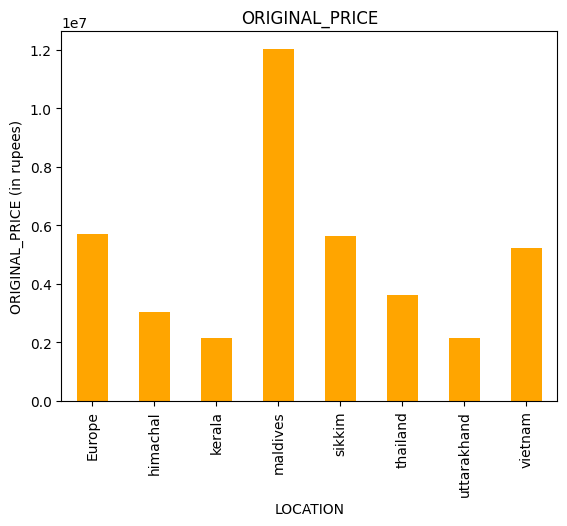

In [ ]:
df.groupby('LOCATION')['ORIGINAL_PRICE'].sum().plot(kind='bar', color='orange')



plt.title('ORIGINAL_PRICE')
plt.xlabel('LOCATION')
plt.ylabel('ORIGINAL_PRICE (in rupees)')
plt.show()

In [ ]:
df.groupby(['SELECTED_STAR_RATING',"LOCATION"])['ORIGINAL_PRICE'].mean()

SELECTED_STAR_RATING  LOCATION   
2                     himachal         21426.30303
                      sikkim          42096.870968
                      uttarakhand     15592.894737
3                     Europe          46254.606557
                      himachal        25265.565789
                      kerala           17048.32381
                      maldives        71587.545455
                      sikkim           46916.16129
                      thailand         28480.27907
                      uttarakhand     18861.021978
                      vietnam              61084.6
4                     Europe          48847.465517
                      himachal        36529.454545
                      kerala          24639.307692
                      maldives       101105.068966
                      sikkim          53413.095238
                      thailand        30250.614286
                      uttarakhand        18467.375
                      vietnam        122488.052632
5                     Europe               56000.0
                      kerala               20205.5
                      maldives       148509.107143
                      sikkim               71621.5
                      thailand        37673.428571
                      vietnam         49974.333333
Name: ORIGINAL_PRICE, dtype: Float64

In [ ]:
most_repeated_star_rating=df.groupby(['LOCATION','CATEGORY'])['SELECTED_STAR_RATING'].apply(lambda x: x.mode().iloc[0])
most_repeated_star_rating

LOCATION     CATEGORY 
Europe       family       4
             friends      3
             honeymoon    4
himachal     family       3
             friends      3
             honeymoon    3
kerala       family       3
             friends      3
             honeymoon    3
maldives     family       5
             friends      5
             honeymoon    5
sikkim       family       3
             friends      3
             honeymoon    3
thailand     family       4
             friends      4
             honeymoon    4
uttarakhand  family       3
             friends      3
             honeymoon    3
vietnam      family       3
             friends      3
             honeymoon    3
Name: SELECTED_STAR_RATING, dtype: int64

In [ ]:
df.groupby(['LOCATION','CATEGORY'])['FINAL_PRICE'].mean()

LOCATION     CATEGORY 
Europe       family             39227.1
             friends          34506.675
             honeymoon        55979.875
himachal     family           22108.875
             friends          20324.375
             honeymoon        25780.825
kerala       family           15365.225
             friends           14427.25
             honeymoon        18061.975
maldives     family           107105.56
             friends      121039.580645
             honeymoon          78714.1
sikkim       family        40933.512821
             friends            44335.7
             honeymoon     44748.564103
thailand     family           22287.225
             friends            26786.5
             honeymoon          32427.7
uttarakhand  family             17554.3
             friends           13162.15
             honeymoon     19253.921053
vietnam      family        48187.294118
             friends       72688.322581
             honeymoon     88515.526316
Name: FINAL_PRICE, dtype: Float64

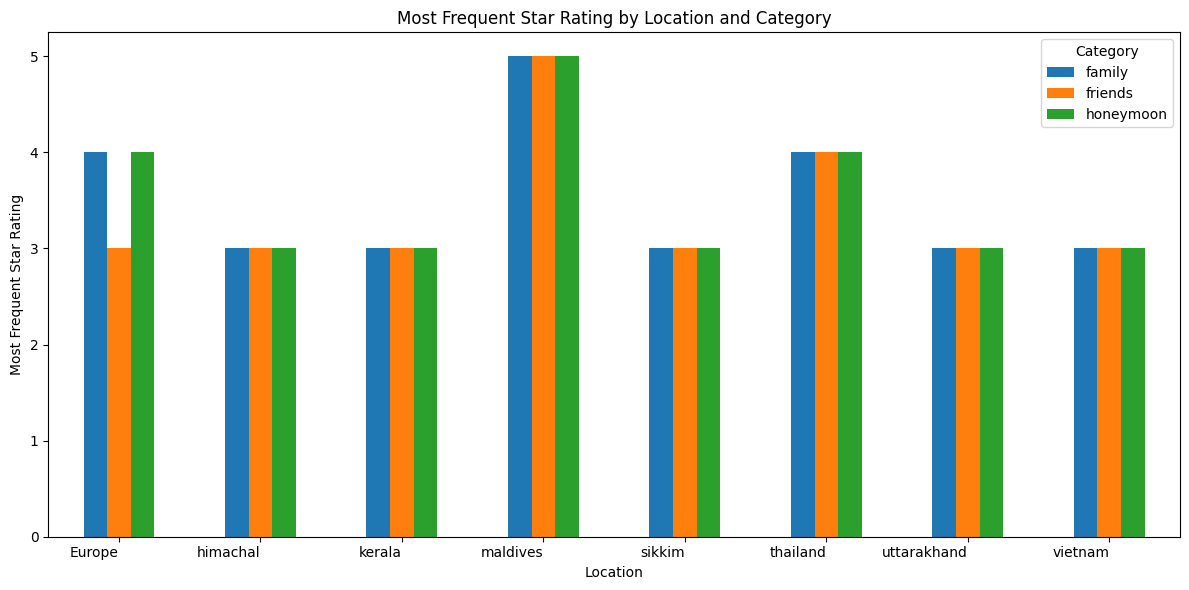

In [ ]:
import matplotlib.pyplot as plt

most_repeated_star_rating.unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Most Frequent Star Rating by Location and Category')
plt.xlabel('Location')
plt.ylabel('Most Frequent Star Rating')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Category')
plt.tight_layout()
plt.show()